# The Battle of Neighborhoods- Milan neighborhoods price houses

Gabriele Cecere

1st January 2021

## Introduction

Creative Capital of fashion and luxury, Milan is a cutting-edge city, very active in economic and cultural profile, a reality to be discovered to find its hidden treasures of poetic views, Art Nouveau buildings and small architectural gems ranging from Gothic to Romanesque style, scattered throughout its beautiful and ancient historic center, a reason that drives millions of visitors from all over the world every day to visit the city of charm and glamor.

Milan is also listed within the top 10 cities for investments in Western Europe and mentioned as one of the preferred destinations for investing in the real estate sector.

## Business Problem

The aim of the project is to investigate about what are some of the variables that contribute to drive up the house's prices in some neighborhoods respect other neighborhoods. In particular the study try to analize if there is some relationship between the presence of specific venues in a neighborhood and the price's houses in that neighborhood.

## Data Description

To perform all the analysis and give an answer to our problem, we need to rely on some data. 

- First of all, we need to obtain the house prices' for each area of Milan. For this aim, we need to web scrape data from [**immobiliare.it**](https://www.immobiliare.it/mercato-immobiliare/lombardia/milano/), an italian platform for publishing and searching for real estate ads.
    
    *Zone:* Neighborhoods in each area
    
    *Vendita:* Average sale price per square meters in each area
    
    *Affitto:* Average rent price per square meters in each area (we aren't use this variable)
    

- Next, to obtain the geo location of each neighborhood we use **ArcGIS API**. Part of the Esri Geospatial Cloud, ArcGIS enables to connect people, locations, and data using interactive maps. Through this API we obtain 2 new columns:

    *Latitude:* Latitude for each neighborhood
    
    *Longitude:* Longitude for each neighborhood
    

- Finally, we use **Foursquare API** to obtain data about different venues in each neighborhood. Foursquare is the most trusted, independent location data platform for understanding how people move through the real world. Using this API we obtain 5 addictional columns:

    *Neighborhood:* Name of the neighborhood
    
    *Neighborhood Latitude:* Latitude of the neighborhood
    
    *Neighborhood Longitude:* Longitude of the neighborhood
    
    *Venue:* Name of the venue
    
    *Venue Category:* Category of the venue
    


## Methodology

To develop the project and solve our business problem, we will use python. The first step consists in importing the requiered libraries:

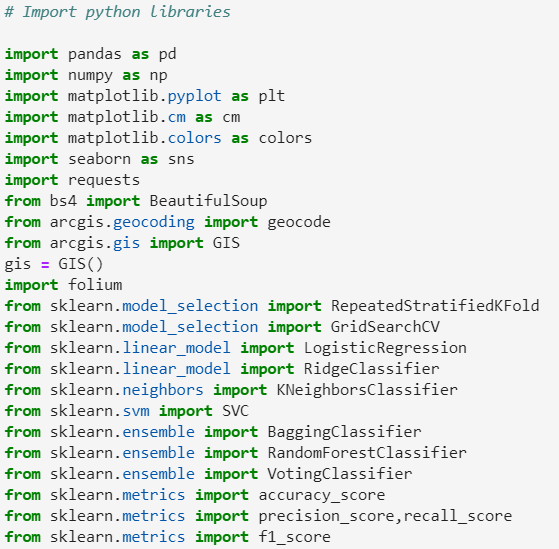

- *pandas:* Used to collect and to manipulate data in HTML and then for data analysis
- *numpy:* Used to do math operations with DataFrame columns
- *matplotlib and Seaborn:* Used to generate differnt plots
- *requests:* Used to handle http requests
- *BeautifulSoup:* Used to web scraping data
- *arcgis:* Used to obtain the geo location of each neighborhood
- *folium:* Used to generate maps for Milan
- *sklearn:* Used to develop and test the model

### Data Collection

#### a) House price data

First of all we proceed to web scraping the house prices' for each area of Milan from the immobiliare.it webpage. To do that, we use the following code:

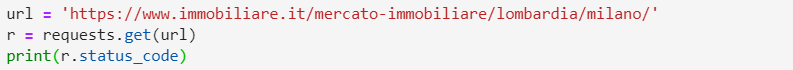

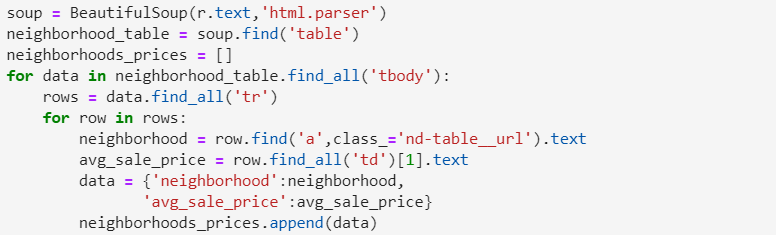

With the purpose of better visualization and better manipulaton of the data, we proceed to insert it inside a DataFrame

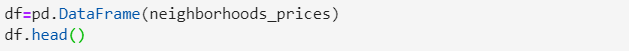

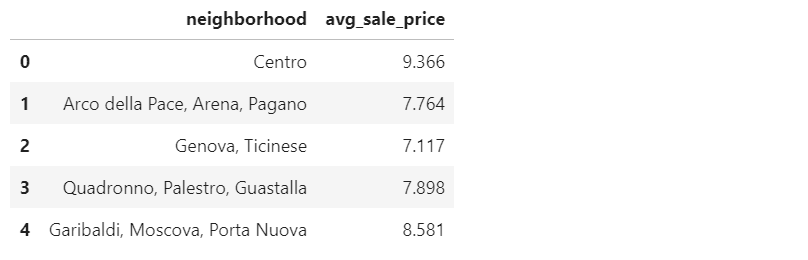

The dataframe gather the average sale price per squared meter of houses in different zones of Milan. For a better Analysis and to correctly positioned the neighborhoods on the map, we renamed and split them.

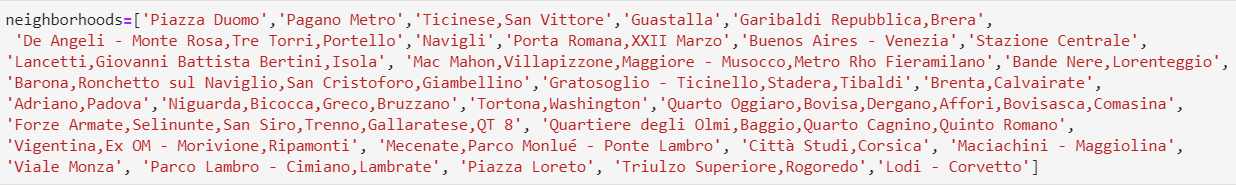

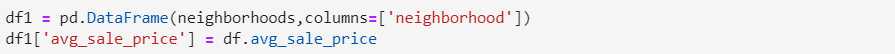

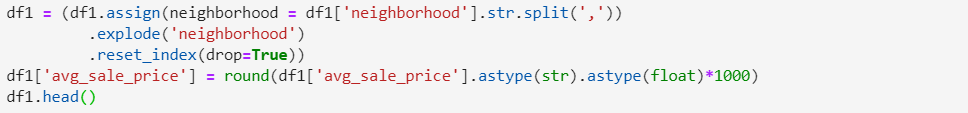

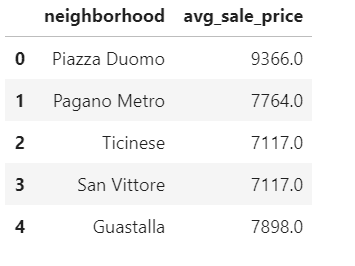

Now results interesting to observe the distribution of the hose price. We use the seaborn library as follow:

And we obtain the following plot:

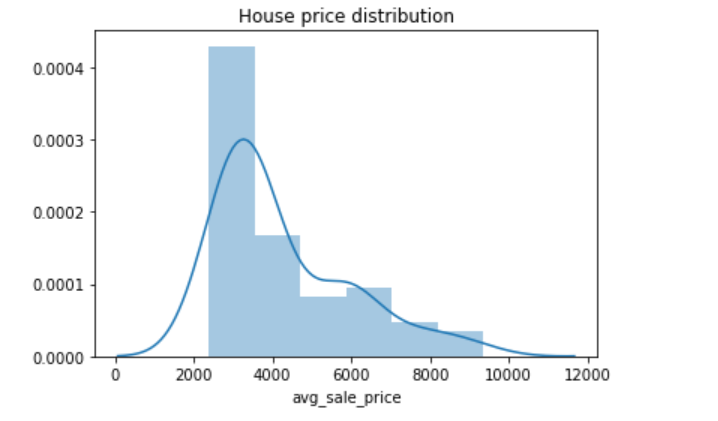

From the graph we can see that the price distribution is right skewed with the mayority of price concentrated beween approximatly 2300 and 3500, as we can see from the following table with the data description:

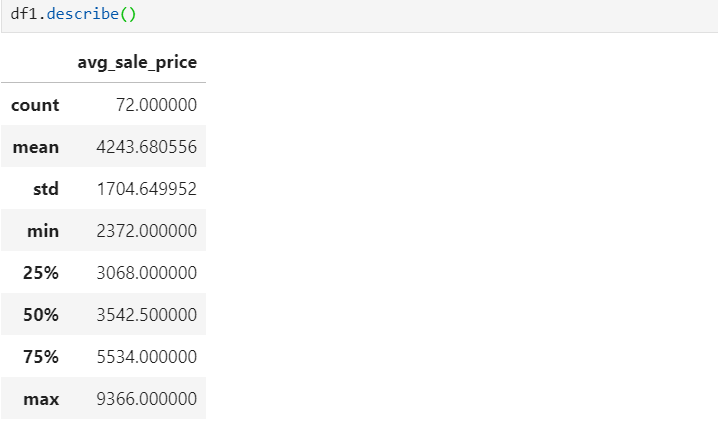

Now we proceed to cluster the data in two categories of price: **1** = *Low Price (Price <= 4.000)* and **2** = *Medium/High Price (Price > 4.000)*

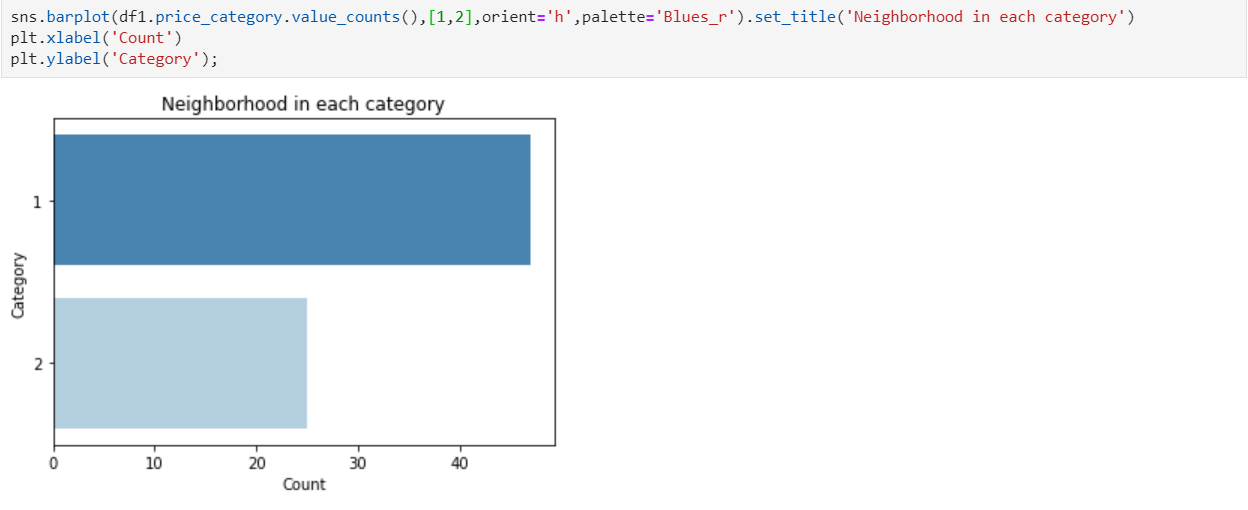

Now using the ArcGis API we obtain the latitude and longitude cordinates for each neighborhood and insert it into the df1 dataframe

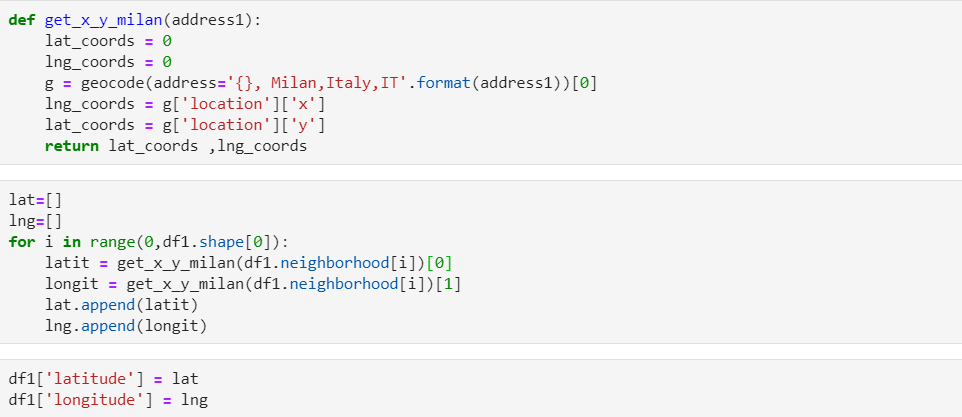

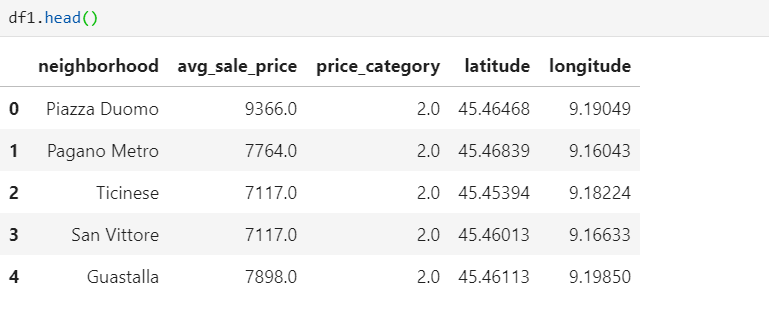

As we now have the neighborhood coordinates, we can proceed to visualize the Milan map using the folio library and we plot also the price category clusters

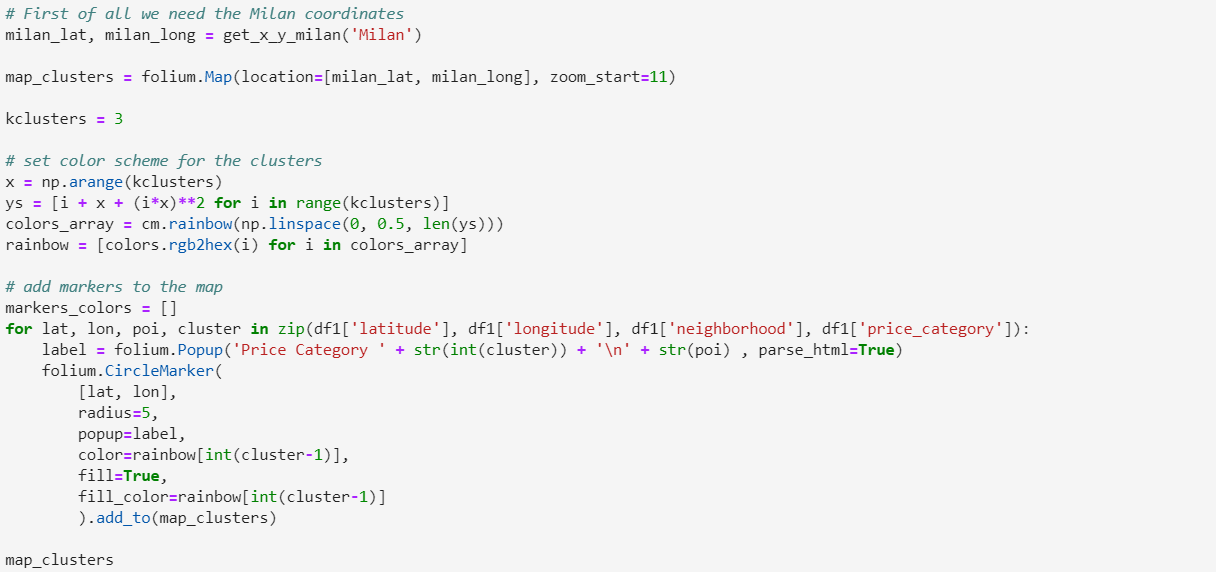

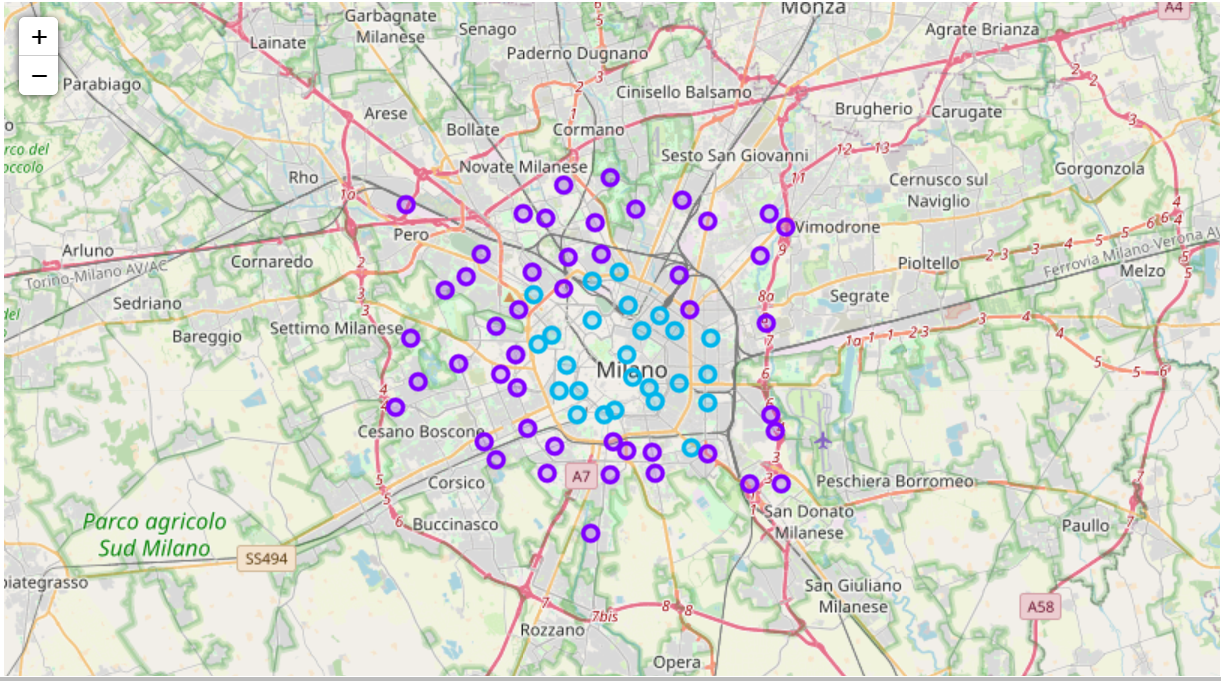

#### b) Venues Data

Next step is to obtain the list of venues in each neighborhood. We use the Foursquare API: First we create variables with the API credentials and after that, we define a function to obtain for each neighborhood all the venues in a range of 500 meters.

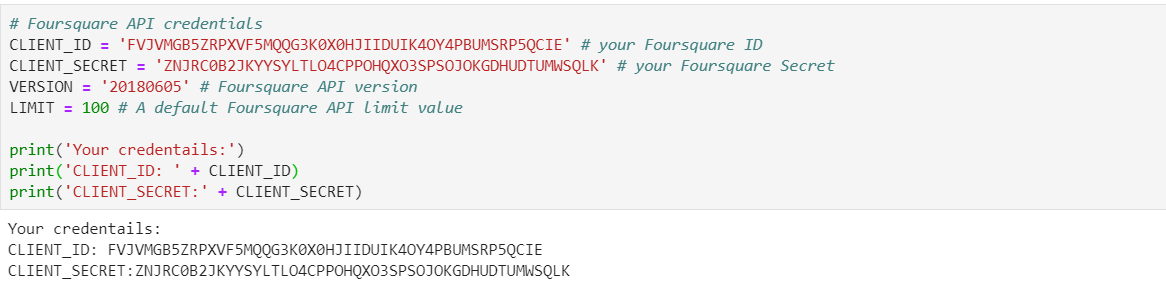

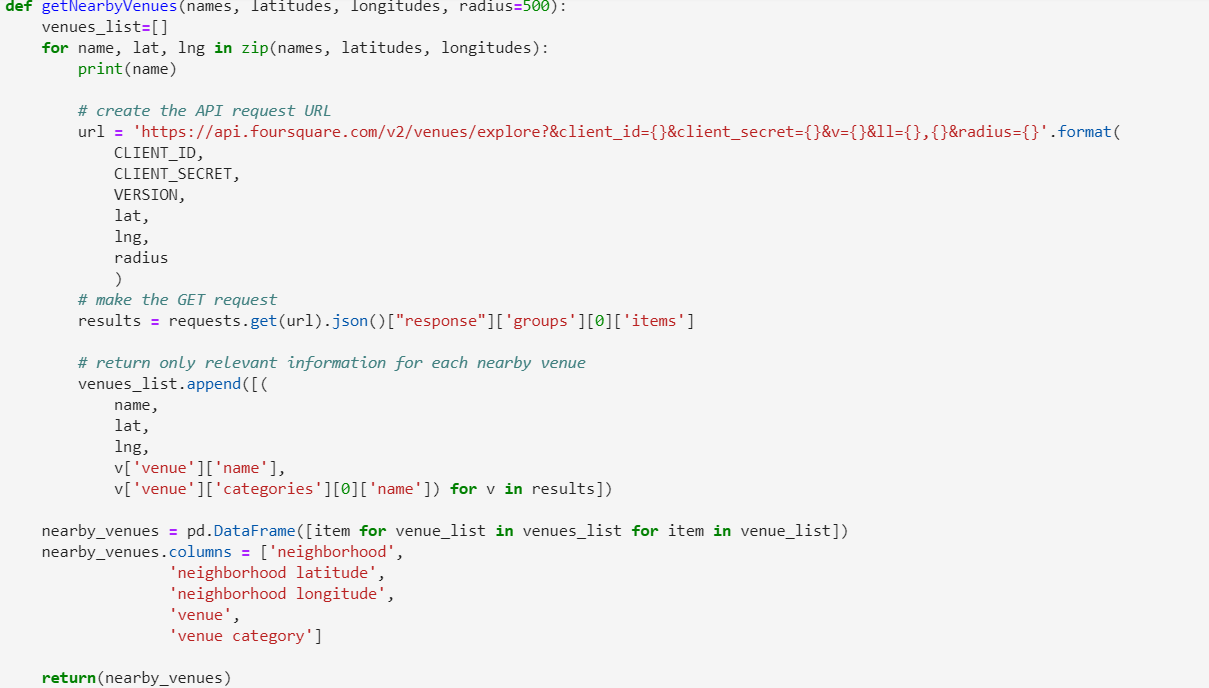

We obtain the following dataframe:

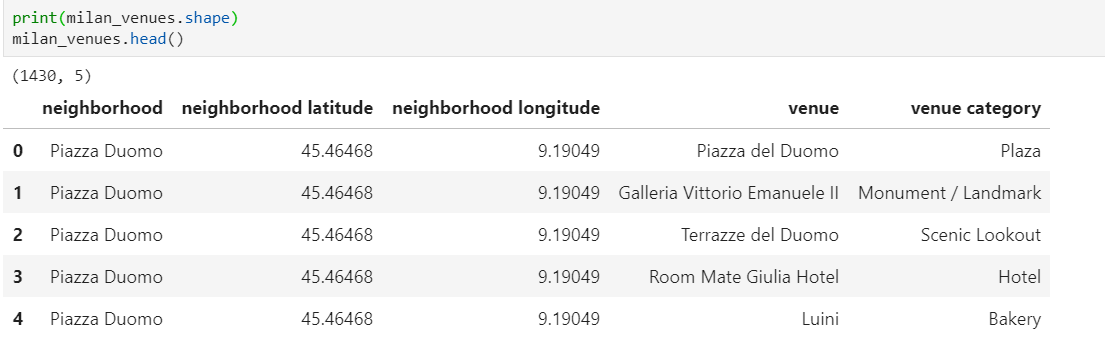

#### One Hot Encoding

Because the venues are categorial datatype, to proceed to model it and use machine learning to solve our problem, we need to convert it into numerical datatype. The one hot encoding represent the best choice in this case.

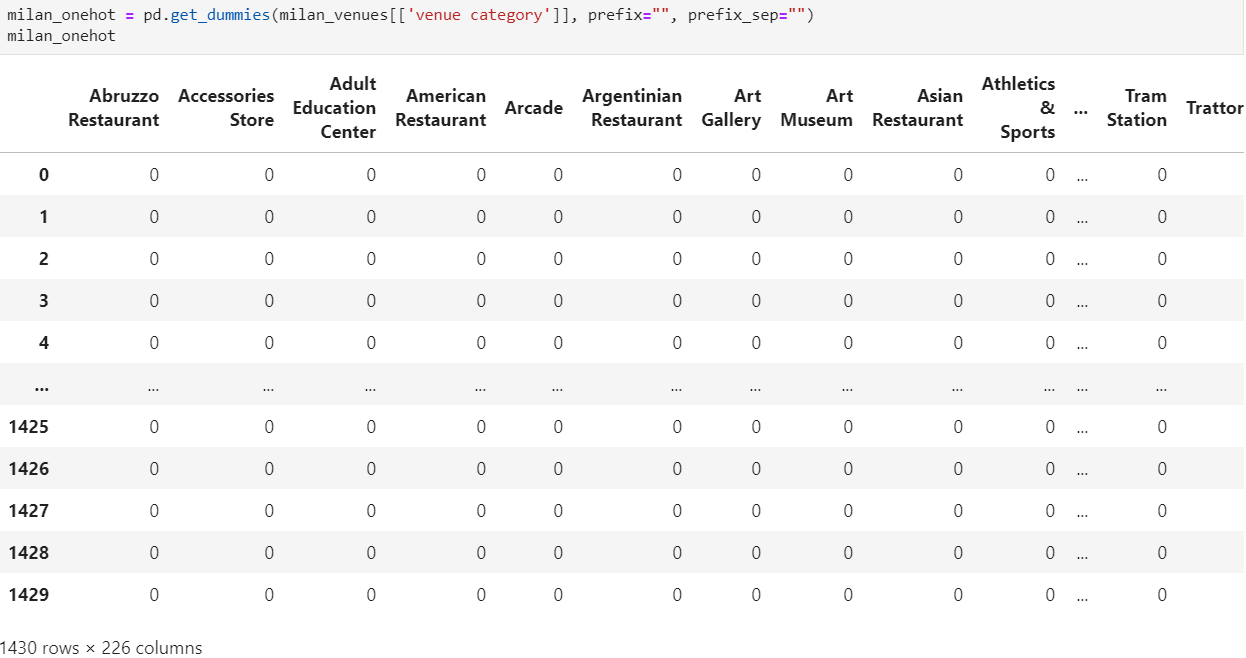

Next we add back the neighborhood column as a first column:

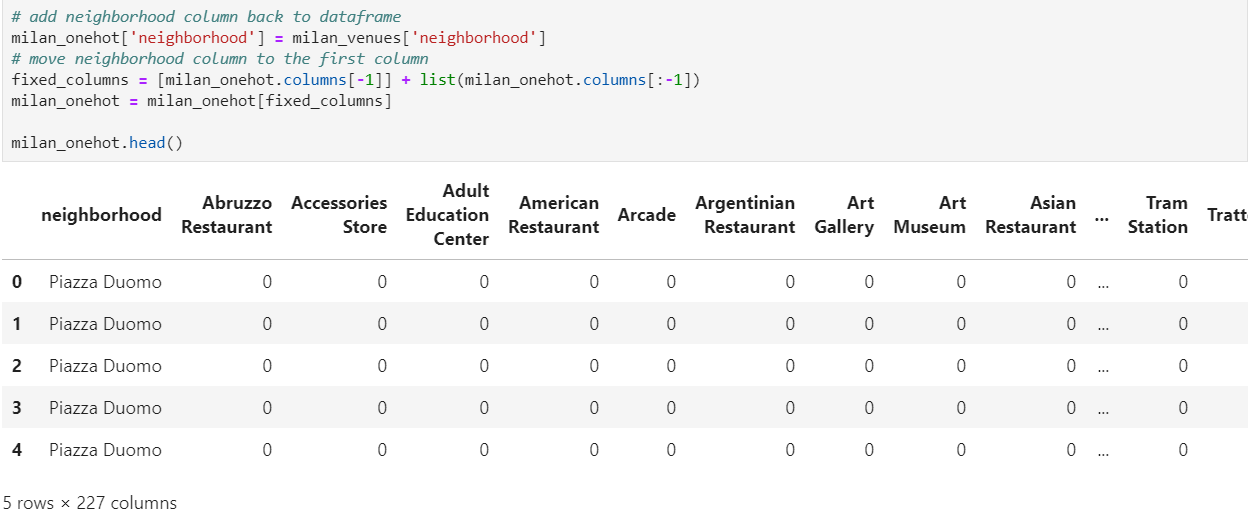

Now we grouped it by the neighborhood, summing for each neighborhood all the category venues:

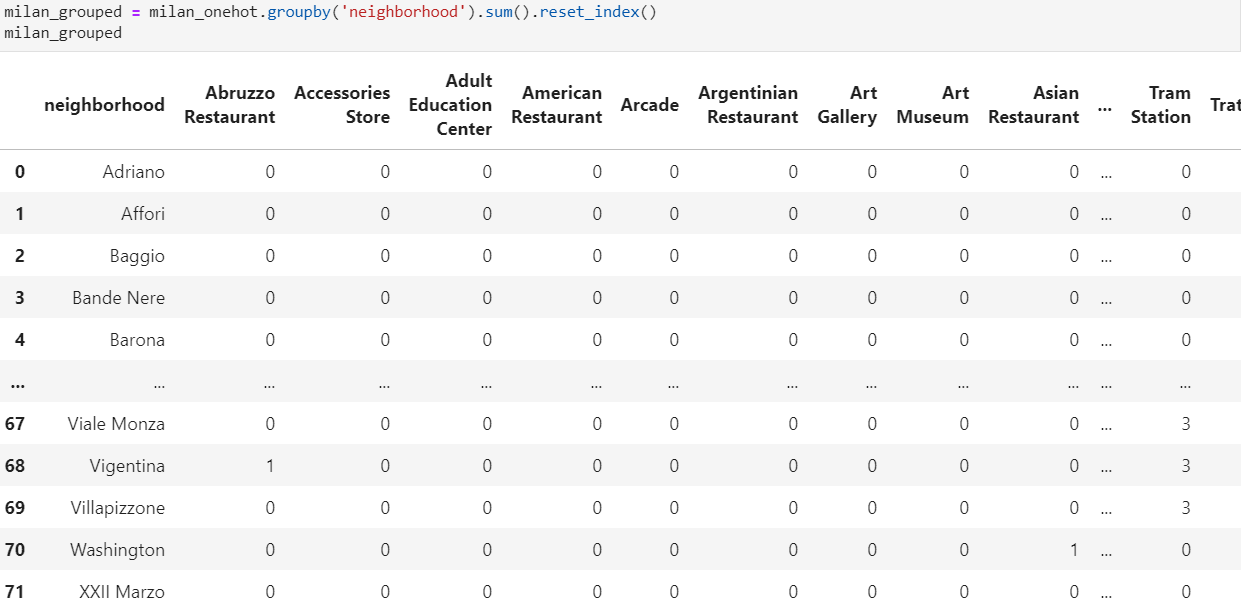

Now we proceed to join it with previous dataframe:

#### Clean the data

We can see taht in total there are 226 venues categories. Investigating the categories we can note that we can proceed to group them in a same bigger category. In this way we can reduce our features from 226 to 34. The categories are the following:

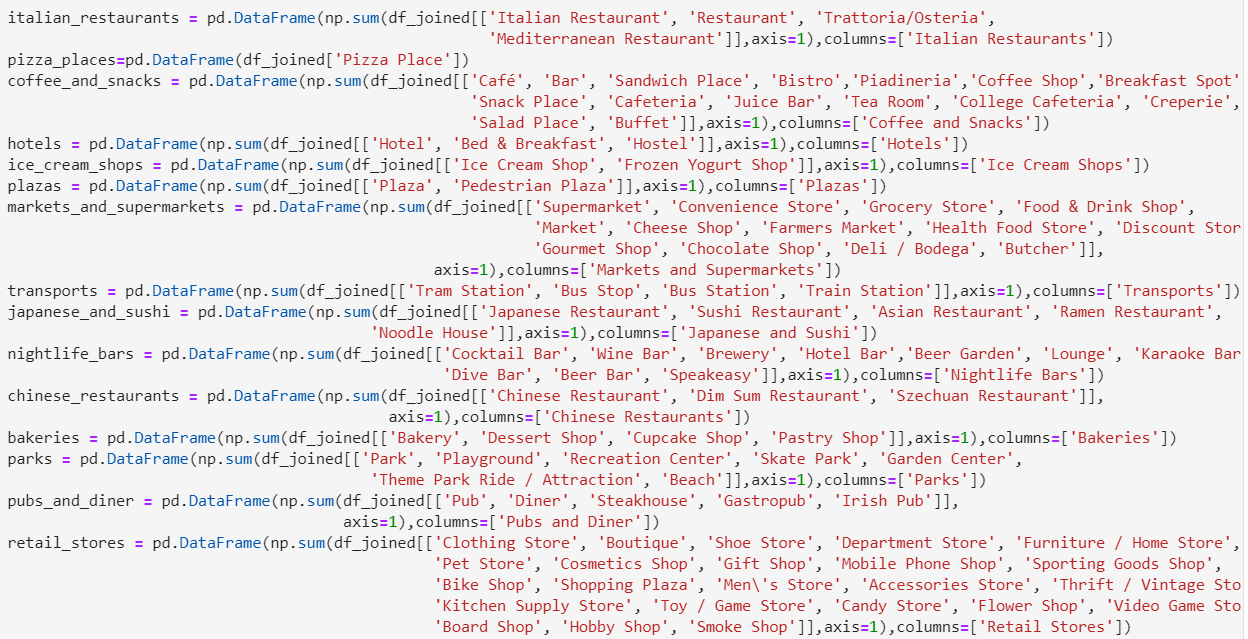

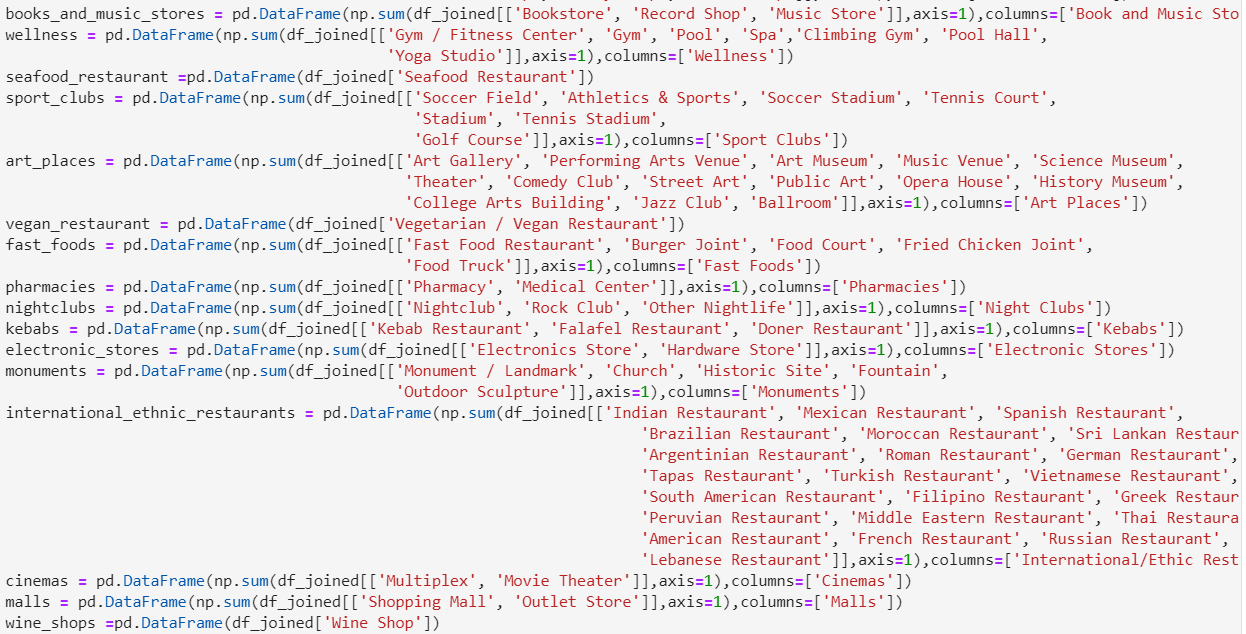

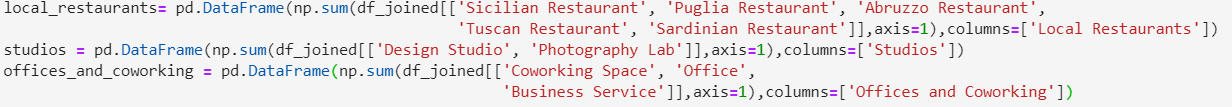

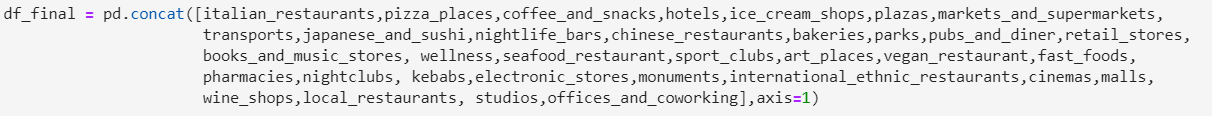

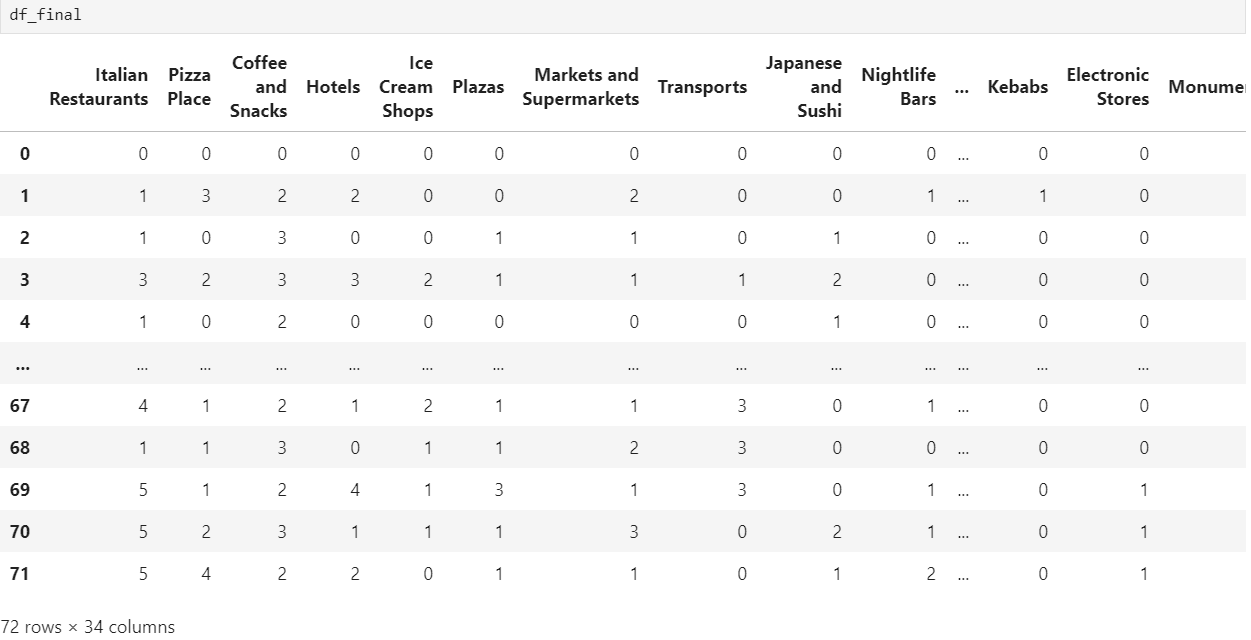

Finally, before to model our data, we create a new feature: the presence of a Metro station in the neighborhood, to insert on the final dataframe. We import it from a excel spreadsheet:

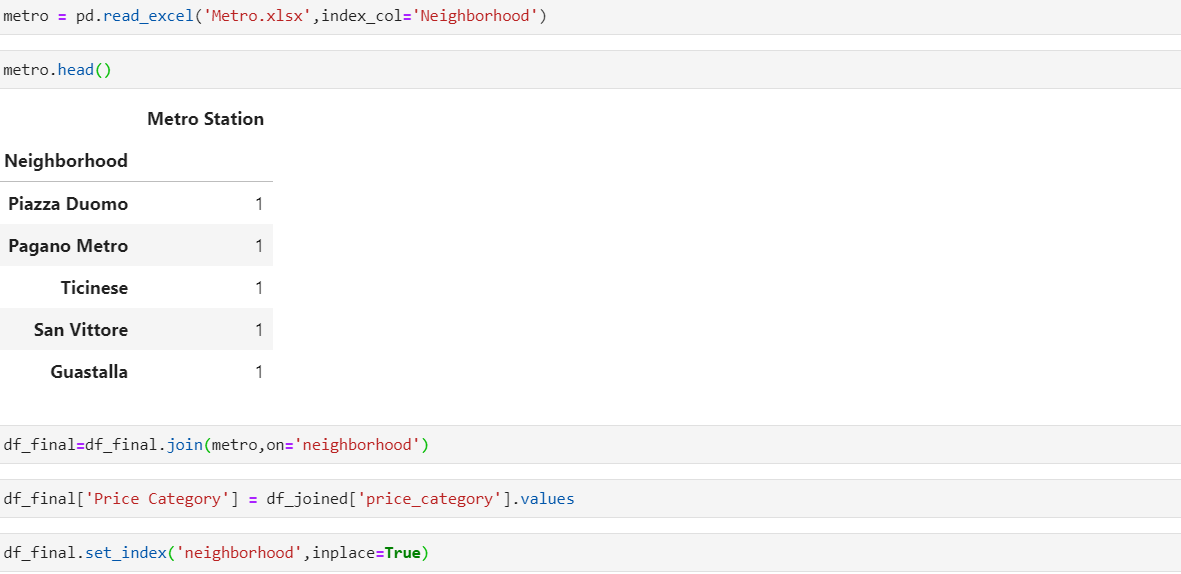

### Machine Learning Model

First of all, we need to split the data in 2 parts: X with the features and y with the labels. Futhermore we use part of the same data to train the model and the other to test it. (we use 14 samples to test the model)

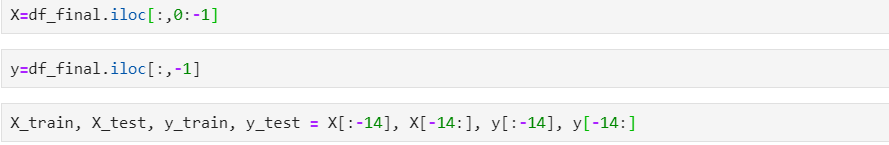

To choose the better model, we have taken 6 classification models and proceeded to tune its parameters through the grid search procedure.

The best model that resulted is the Random forest with an accurancy of approx. 85% max_features= 'sqrt' and n_estimators= 100

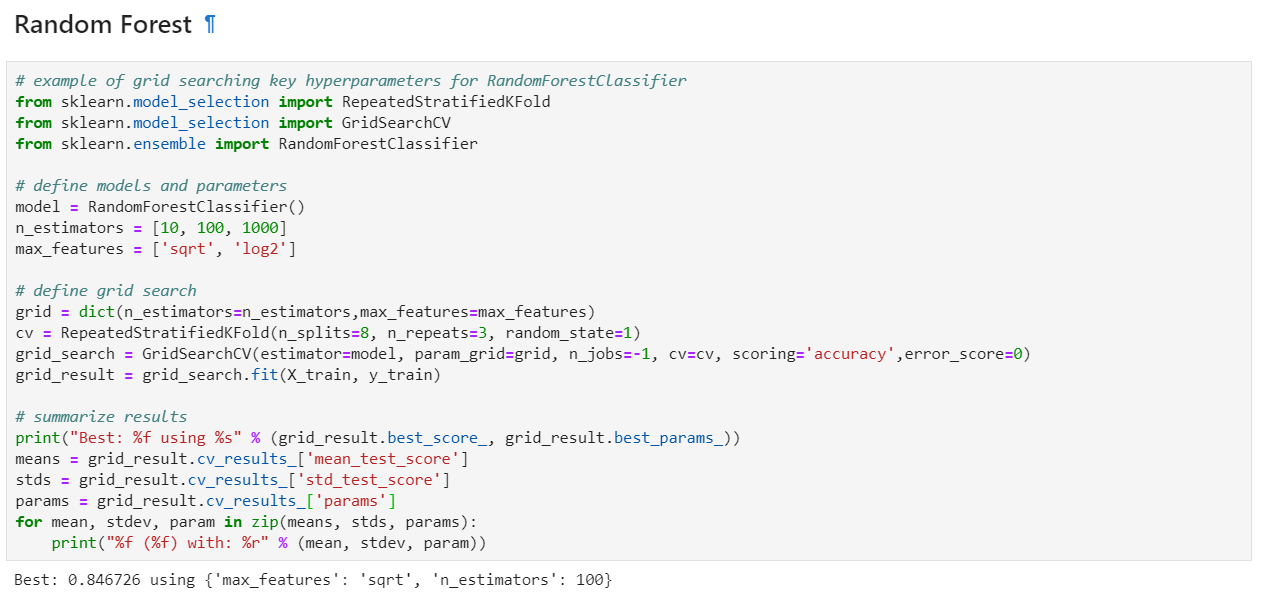

So we use the Random Forest Model to train our data.

We also analyzed the features importance from the model and plot it as follow:

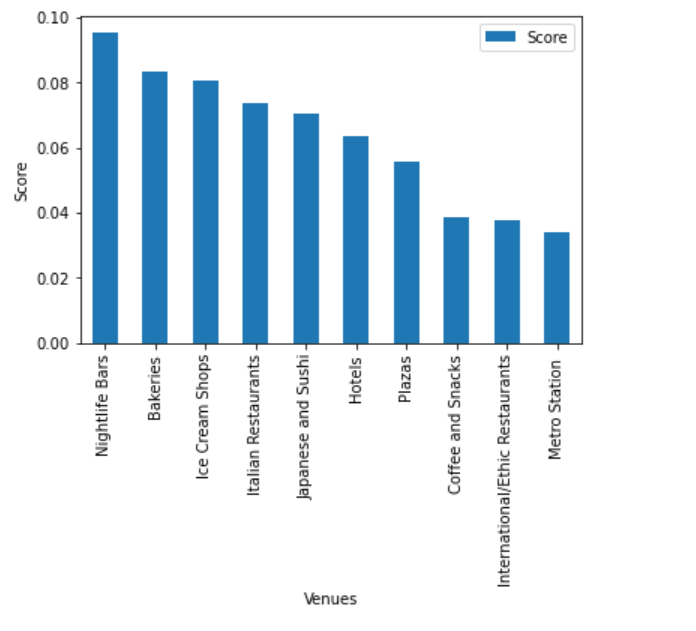

As you can see the 10 most important features from the model refear primarly to venues related with the city nightlife, tourism and the presence of a Metro staton in the neighborhood.

#### Performance Measures

##### Accurancy through Cross Validation

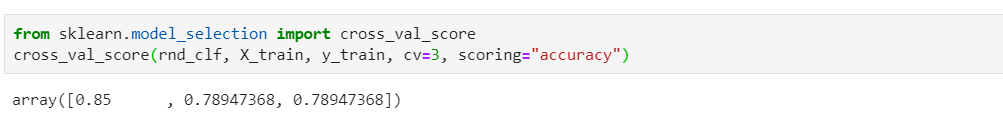

##### Precision, Recall and F1 Score

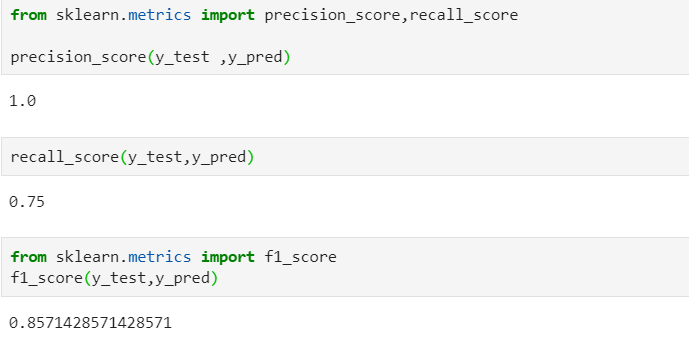

From this metrics the model seems to works pretty good. Now we can use the model to predict the test data and comapare it with the real data:

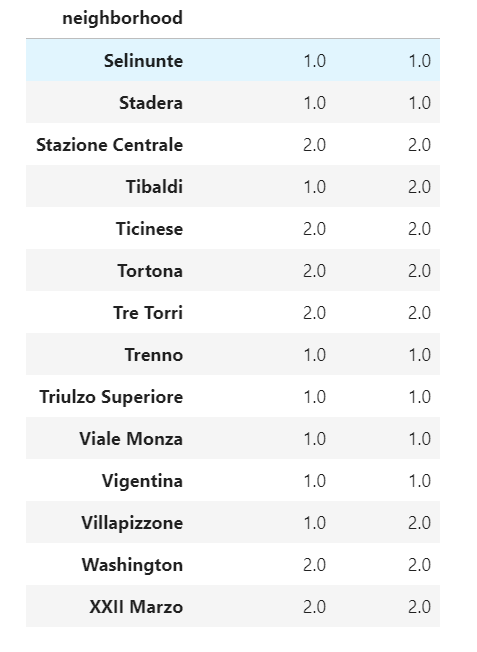

From the comparison table we can appreciate that our model made an error only in 2 observation so we can confirm that the model works good.

## Conclusion

The model had the aim to investigate the existence of some type of relationship between the house prices in different neighborhood of Milan and the venues that there are in the same neighborhood. 

The model showed that the 10 most important venues to classify a neighborhood with a presence of low or medium/high price houses are: Nightlife Bars, Bakeries, Ice Cream Shops, Italian Restaurants, Japanese and sushi, Hotels, Plazas, Coffee and Snacks, International Restaurants and Metro station. This seems reasonable because the venues are related to cool neighborhoods of Milan where is concentrated the nightlife, tourism zones and neighborhoods with the presence of a Metro station that represent a key element to move easy from one part to other parts of the city.

From the performance metrics we have demonstrated that the model works pretty good in the prediction of the category price of the neighborhood.

We conclude that if we want estimate the price of an house, in addiction to the classic parameters like the number of rooms,square feet of the apartment and others, we can include also the presence of a venues in the neighborhood. 